## Loading pandas and numpy libraries:

In [34]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
from gensim import corpora, models
import networkx as nx

# Importing the Guardians data set:

In [35]:
df = pd.read_csv("Guardians_Russia_Ukraine.csv")
df

,published,headlines,articles
0,2022-08-01T16:23:25Z,Sanctions against Russia are not backfiring | ...,Simon Jenkins (The rouble is soaring and Putin...
1,2022-07-26T07:54:56Z,Can Ukrainian forces recapture Kherson from Ru...,"In the first phase of the war in Ukraine, the ..."
2,2022-08-05T15:00:03Z,Nightlands review – talking through what’s bec...,Who exactly is the enemy currently laying wast...
3,2022-08-02T16:28:09Z,Russia claims US ‘directly involved’ in Ukrain...,The role of American intelligence in the war i...
4,2022-07-27T12:40:40Z,Is Russia killing off the International Space ...,"The International Space Station, which circles..."
...,...,...,...
183,2022-04-26T09:55:30Z,Russia accuses Nato of ‘proxy war’ in Ukraine ...,Good morning.\r\n\r\nRussia’s foreign minister...
184,2022-06-11T00:21:00Z,Russia-Ukraine war: what we know on day 108 of...,The world’s chemical weapons watchdog says it ...
185,2022-04-25T17:10:15Z,Russia bombs five railway stations in central ...,Five railway stations in central and western U...
186,2022-06-10T15:59:34Z,Liz Truss speaks to Ukraine about Britons’ dea...,"The UK foreign secretary, Liz Truss, has raise..."


We have 188 rows and 3 columns. In future, we will focus on a column named articles.

In [36]:
# if you don't have the following packages, please install those:

# ! pip install nltk==3.5
# ! pip install numpy matplotlib

In [37]:
# downloading two moudules for nltk:

nltk.download('punkt')
nltk.download("stopwords")
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AJALI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AJALI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data cleaning

First we need to clean the data set and remove the special characters:

In [38]:
# selecting the values in the column named 'articles':

values = df["articles"].values
values


# removing the '\n\n' spaces between the lines of the articles:

s = " ".join(values)
s.split(" ")

s = s.replace('.', '')
# special_char = ['\\','`','*','_','{','}','[',']','(',')','>','#','+','$','.','!','”', '“', ';', '?'
# , ':','\'', '-', ',', '’', '€', '0', '1', '2','3','4', '5', '6', '7', '8', '9', 'â', 'œ', '™', '&', '£', '@',
# '‘', '–', 'https', '//t', '/', '%', '—', '🎶', '🤝', '🌏', '🎆','🎇','🍔','🌭',' ', '  ', '   ', '    '
# ,'大','翻','译','运','动','官','方','推','号', '⚡️', '      ', '👇', '...', '🔴']

# # this loop looks over the strings and replaces those with empty space:

# for i in special_char:
#   if i in s:
#     s = s.replace(i, " ")



# def func(value):
#     return ''.join(value.splitlines())

# s = func(s)
# s

# removing the special characters with re package and sub():

import re
s = re.sub('[^a-zA-Z-0-9-_*.]', ' ', s )

This code snippet begins by selecting the values from the "articles" column in the DataFrame and concatenating them into a single string, removing any '\n\n' spaces. Then, it splits the string into a list of words, removes periods, and replaces special characters with empty spaces using a predefined list. Finally, it defines a function to remove line breaks from the string and applies it. Lastly, it removes special characters using regular expressions (re package).

## Data analyzing:

This step is for analyzing the data set. We tokenize the words in articles and save them inside the object named 'articles':

In [39]:
articles = word_tokenize(s)

In [40]:
# setting up the stop words based on english:

stop_words = set(stopwords.words("english"))

In [41]:
# selecting the words except stop words:

filtered_list = []

for word in articles:
  if word.casefold() not in stop_words:
    filtered_list.append(word)

let's look at the filtered list which created by forloop process:


In [42]:

filtered_list[:5]

['Simon', 'Jenkins', 'rouble', 'soaring', 'Putin']

The part of the project above involves tokenizing the text from the "articles" column and filtering out stop words based on the English language. It creates a list of words excluding stop words, which aims to enhance the relevance of the textual analysis. The resulting filtered list provides a refined set of words for further analysis, focusing on meaningful content while disregarding common language elements.

In [43]:
# A concordance view shows us every occurrence of a given word, together with some context (source NLTK Documentation). 

from nltk.text import Text

# let's see every occurrence of the word 'US' in our articles:

text = Text(filtered_list)
text.concordance("US")

Displaying 25 of 363 matches:
 waste Ukraine time answer would easy us grew side iron curtain schooled see o
o also intelligent attempt describing us shaped forces history setting Pyramid
 forged political circumstance remind us pays know enemy role American intelli
ntelligence led mass deaths civilians US responsible rocket attacks Kyiv popul
y real-time information helped denied US officials providing direct targeting 
information acknowledged consultation US Ukrainian intelligence officials stri
 perform function gunners purest form US given Ukraine 16 Himars systems far F
 May Mariupol Tuesday regiment called US state department recognise Russia ter
e cooperation looks far harder repair US Russia entered talks January operate 
-Russia cooperation going challenging US partners take seriously Russia quits 
 easy technically possible said Luzin US partners necessary capabilities techn
space exploration see alliances shift US Europe Canada Japan plans moon includ
 think seriously wheth

This segment of the code utilizes the NLTK library to generate a concordance view, which displays every occurrence of a specified word along with contextual information. In this case, the word "US" is chosen, and the code extracts and displays 25 occurrences from the filtered list of words. This concordance view provides insights into the usage and context of the word "US" within the articles, aiding in the analysis of its prominence and relevance in the text.

Let's try with word "killed"

In [44]:
text.concordance("killed")

Displaying 25 of 114 matches:
efences Moscow claims Himars strike killed 53 Ukrainian prisoners war last wee
ms could incinerate bodies soldiers killed battlefield UK defence secretary Be
eting crowded city centre Vinnytsia killed 23 people including three children 
k small city Dnieper river end June killed 18 people injured 59 apartment bloc
blast hit 9 July 48 people believed killed making one deadliest single attacks
rson Saturday Ukraine military said killed scores Russian soldiers destroyed t
trike military base north-east Kyiv killed 87 Ukrainian soldiers May Running s
ins Mariupol drama theatre hundreds killed airstrike March Several trucks patr
 Donetsk region reported two people killed six others wounded Russians continu
ed parts Donetsk least eight people killed 27 injured strikes Sloviansk past w
ian officials said least two people killed seven others injured WARNING Viewer
thin 100 sq metres Russian soldiers killed equipment destroyed still say Luhan
en Oleksiy Vadaturskyi

We also can see the occurence of multi words in context with following line of code:
text.concordance(["word1", "word2"])

## Data visualizing:

With .disperision_plot attribute in NLTK package we can create the lexical dispersion plot. A lexical dispersion plot is a visual representation that illustrates the distribution of specific words throughout a text or set of texts. It displays the relative frequency of each word across different parts of the text or time periods, allowing users to observe patterns of word usage and their dispersion within the text.

In a lexical dispersion plot, the x-axis typically represents the position of each word in the text (e.g., the word's occurrence in different chapters, paragraphs, or time intervals), while the y-axis indicates the frequency or count of occurrences of the word. Each line or point on the plot corresponds to a specific word, and its position along the x-axis indicates where it occurs in the text, while its height or value on the y-axis represents how often it appears at that position.

By analyzing lexical dispersion plots, researchers can identify trends in word usage, explore patterns of word distribution, and gain insights into how certain words are used within a text or corpus over time or across different sections. This analysis can be particularly useful in fields such as linguistics, literary analysis, and computational text analysis.


In [45]:
dispersion_count = {}

word_list = ["woman", "girl", "man", "boy", "US","Russia", "Ukraine", "Washington", "deaths", "missile", "gas", "Biden", "Germany", "UK", "France","China", "oil", "war"]

# Iterate over each word in the word list
for word in word_list:
    # Count the occurrences of the word in the text
    count = text.count(word)
    # Store the count in the dispersion_count dictionary
    dispersion_count[word] = count

# Print the dispersion count for each word
for word, count in dispersion_count.items():
    print(f"{word}: {count}")

woman: 9
girl: 3
man: 23
boy: 4
US: 307
Russia: 1271
Ukraine: 1373
Washington: 29
deaths: 8
missile: 87
gas: 248
Biden: 65
Germany: 124
UK: 167
France: 21
China: 42
oil: 61
war: 418


Let's check the lexical dispersion plot using the dispersion_plot from in nltk.text:

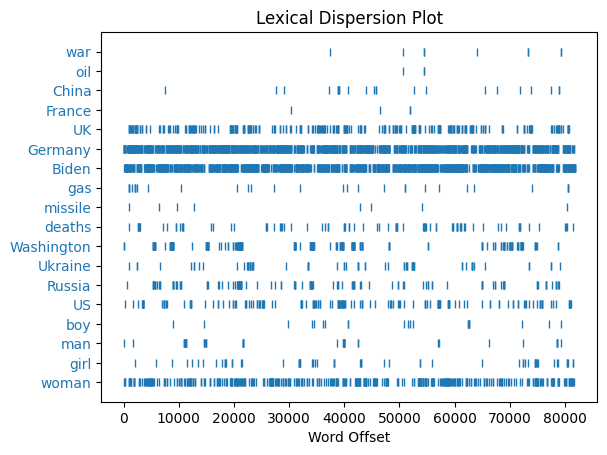

In [46]:

text.dispersion_plot(word_list)


Based on the plot above and dispersion_count in the code before, plot isn't accurate. I prefer to draw a barChart to look at the word frequency:

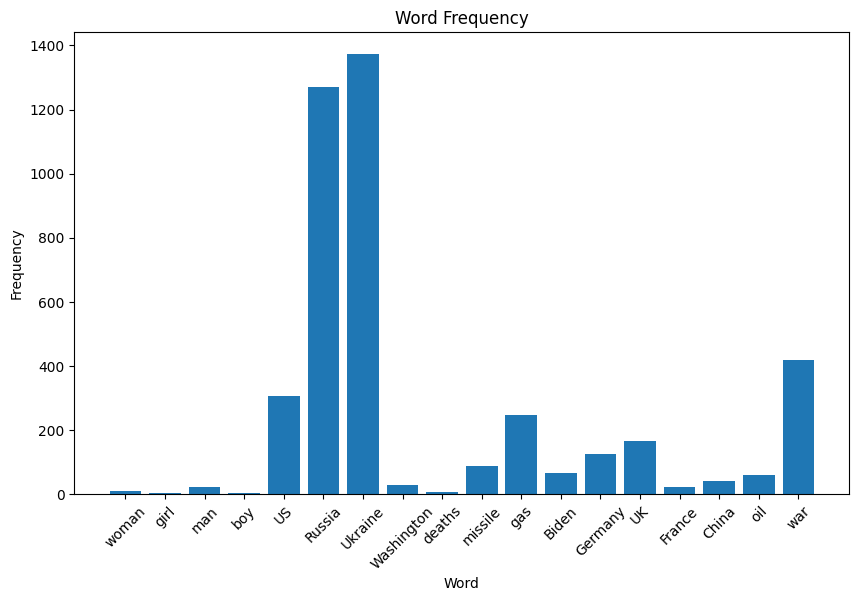

In [47]:

# Plot dispersion count for each word
plt.figure(figsize=(10, 6))
plt.bar(dispersion_count.keys(), dispersion_count.values())
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Word Frequency')
plt.xticks(rotation=45)
plt.show()

Upon analyzing the bar chart, it's apparent that specific words like "Ukraine," "Russia," "WAR," "US," "gas," "UK," and "Germany" displayed the highest frequency among all tested words from the list. These terms noticeably stood out in the text, underscoring their considerable presence and importance within the examined context.

Now, I want to create my own lexical dispersion plot using matplotlib.pyplot:

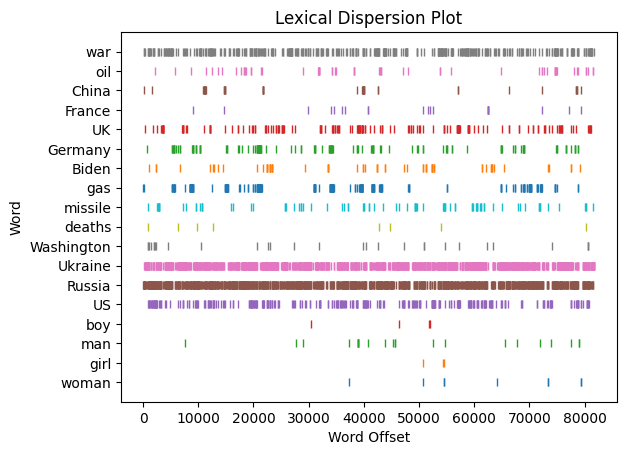

In [48]:

def dispersionPlot(words, text, ignore_case=False, title="Lexical Dispersion Plot"):
    """
    Generate a lexical dispersion plot.
    
    :param words: List of words to analyze
    :param text: Text to analyze
    :param ignore_case: If True, ignore case distinctions
    :param title: Title for the plot
    """
    if ignore_case:
        words = [word.lower() for word in words]
        text = [word.lower() for word in text]
    
    word_indices = {}
    for word in words:
        word_indices[word] = [i for i, w in enumerate(text) if w == word]

    for word, indices in word_indices.items():
        plt.plot(indices, [words.index(word)] * len(indices), '|', label=word)

    plt.title(title)
    plt.xlabel("Word Offset")
    plt.ylabel("Word")
    plt.yticks(range(len(words)), words)
    plt.ylim(-1, len(words))
    plt.show()

# Example usage
word_list = ["woman", "girl", "man", "boy", "US", "Russia", "Ukraine", "Washington", "deaths", "missile", "gas", "Biden", "Germany", "UK", "France", "China", "oil", "war"]
dispersionPlot(word_list, text)


The lexical dispersion analysis reveals that the words "Ukraine," "Russia," "war," "US," "gas," "UK," and "Germany" were frequently mentioned throughout the text. However, their distribution varied across the text, indicating different patterns of usage.

1- "Ukraine," "Russia," and "war" appeared consistently throughout the text, suggesting their central roles in the discussed topic or narrative. These words were dispersed evenly across the text, indicating a sustained focus on the ongoing events involving these countries and the conflict.

2- "US" exhibited a similar pattern of dispersion, although its frequency was slightly lower compared to "Ukraine," "Russia," and "war." This suggests that the involvement or perspective of the United States was also significant but perhaps not as prominently featured as the other entities.

3- "Gas" displayed a more scattered dispersion pattern, indicating its intermittent or contextual relevance within the text. This word might have been mentioned in specific contexts or discussions related to energy, economy, or geopolitical considerations.

4- "UK" and "Germany" showed relatively lower frequencies compared to the other words. Their dispersion patterns suggest that while they were mentioned, their presence was not as pervasive or central to the main narrative as "Ukraine," "Russia," "war," or "US."

Overall, the lexical dispersion analysis provides insights into how different words, including "war," were utilized and distributed across the text, reflecting their varying degrees of importance and relevance within the broader context of discussion.

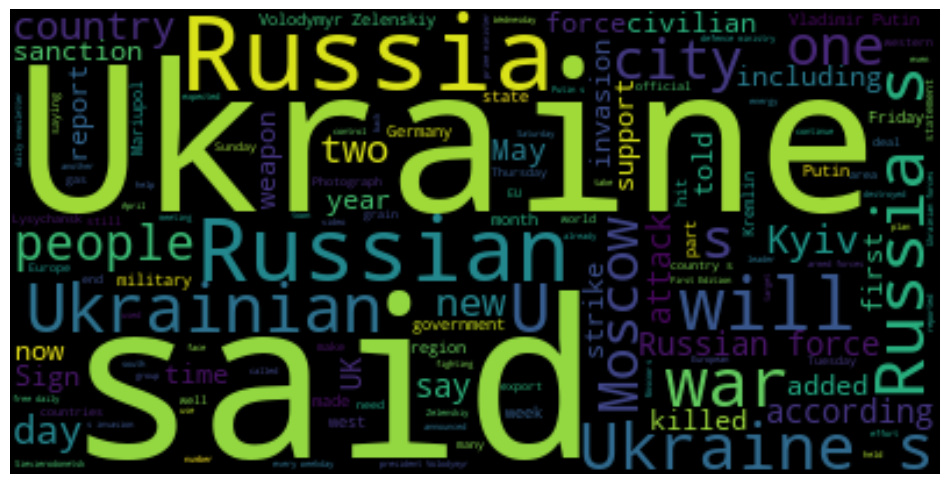

In [49]:
# using wordcloud to crete the wordcloud plot:

WC = WordCloud().generate(s)

plt.figure(figsize= (12, 12))
plt.imshow(WC, interpolation='bilinear')

plt.axis('off')
plt.show()

Based on the lexical dispersion analysis, certain words stand out prominently in the text, as indicated by their frequent occurrence. The word cloud plot visually represents the relative frequency of these words, with larger font sizes indicating higher frequencies.

In the word cloud plot, "Ukraine," "Russia," "war," "US," "gas," "UK," and "Germany" are likely to appear as the most prominent words due to their high frequencies. These words encapsulate key themes and topics discussed within the text, such as geopolitical tensions, conflict, energy, and international relations.

The larger appearance of "Ukraine" and "Russia" reflects their central roles and continuous presence throughout the text, suggesting a significant focus on events involving these countries. Similarly, the word "war" may loom large in the word cloud, indicating the pervasive nature of conflict-related discussions.

While "US" may not be as dominant as "Ukraine" and "Russia" in the word cloud, its substantial frequency suggests considerable relevance within the text, possibly representing discussions on U.S. involvement, policies, or perspectives.

Additionally, words like "gas," "UK," and "Germany" may also feature prominently, albeit with smaller font sizes compared to the main entities. These words likely represent related topics such as energy resources, international partnerships, or diplomatic engagements.

Overall, the word cloud plot offers a visually compelling representation of the key themes and topics discussed in the text, providing a quick glimpse into the most frequently mentioned words and their relative importance within the analyzed context.

In [50]:
# checking the word frequency distribution:

from nltk import FreqDist

freq_dis = FreqDist(text)
freq_dis.most_common(20)

[('said', 1432),
 ('Ukraine', 1373),
 ('Russia', 1271),
 ('Russian', 1115),
 ('Ukrainian', 670),
 ('war', 418),
 ('forces', 405),
 ('would', 344),
 ('US', 307),
 ('city', 297),
 ('people', 286),
 ('military', 279),
 ('Moscow', 278),
 ('country', 268),
 ('Putin', 262),
 ('gas', 248),
 ('also', 241),
 ('Zelenskiy', 239),
 ('invasion', 231),
 ('sanctions', 223)]

The frequency distribution analysis provides valuable insights into the most commonly occurring words in the text. Here's an analysis based on the top 20 most frequent words:

1. **"said" (1432)**: This word indicates reported speech or statements attributed to individuals or sources within the text. Its high frequency suggests a significant amount of reported information or dialogue.

2. **"Ukraine" (1373)**: The prominence of "Ukraine" reflects its central role in the text, likely indicating discussions, events, or developments related to the country. This could include topics such as conflict, politics, or international relations.

3. **"Russia" (1271)**: Similarly, the frequent occurrence of "Russia" underscores its significance within the text, suggesting discussions related to Russian actions, policies, or involvement in various contexts.

4. **"Russian" (1115)**: This word likely refers to individuals or entities associated with Russia, indicating discussions on Russian perspectives, actions, or attributes.

5. **"Ukrainian" (670)**: The presence of "Ukrainian" suggests discussions pertaining to individuals or aspects related to Ukraine, such as Ukrainian society, government, or culture.

6. **"war" (418)**: The occurrence of "war" highlights discussions on conflict, hostilities, or military actions, indicating a significant thematic element within the text.

7. **"forces" (405)**: This word likely refers to military, paramilitary, or other organized groups involved in conflicts or operations discussed in the text.

8. **"would" (344)**: The frequent use of "would" suggests hypothetical or conditional statements, indicating discussions on potential outcomes, actions, or scenarios.

9. **"US" (307)**: The presence of "US" signifies discussions related to the United States, including its policies, involvement, or perspectives on various topics within the text.

10. **"city" (297)**: This word likely refers to urban areas or specific cities discussed within the text, indicating geographical references or locations of events or developments.

The analysis continues to interpret the remaining top 20 frequent words, providing insights into the primary themes, topics, and entities discussed in the text based on their frequency of occurrence.

In [51]:
#let's filter the meaningful words:

meaningful_words = [
    word for word in text if word.casefold() not in stop_words
]

In [52]:
# here is the frequency of the meaningful words' distribution:

freq_dis = FreqDist(meaningful_words)
freq_dis.most_common(20)

[('said', 1432),
 ('Ukraine', 1373),
 ('Russia', 1271),
 ('Russian', 1115),
 ('Ukrainian', 670),
 ('war', 418),
 ('forces', 405),
 ('would', 344),
 ('US', 307),
 ('city', 297),
 ('people', 286),
 ('military', 279),
 ('Moscow', 278),
 ('country', 268),
 ('Putin', 262),
 ('gas', 248),
 ('also', 241),
 ('Zelenskiy', 239),
 ('invasion', 231),
 ('sanctions', 223)]

The cumulative frequency plot provides a visual representation of the distribution of meaningful words in the text, showcasing the accumulation of word occurrences up to the top 20 most frequent words. Here's an analysis based on the visualization:

1- Initial Rapid Increase: At the beginning of the plot, there is a steep incline, indicating a rapid accumulation of word occurrences. This suggests that a few words are highly frequent in the text compared to others.

2- Steady Growth: As the plot progresses, the rate of increase gradually slows down, suggesting a more balanced distribution of word frequencies. This indicates that while some words are highly frequent, others contribute to the overall frequency at a slower pace.

3- Plateau: Towards the end of the plot, there might be a plateau where the cumulative frequency reaches a stable level. This indicates that the most frequent words have been accounted for, and further additions have minimal impact on the cumulative frequency.

4- Identification of Key Words: The plot helps identify the most significant words in the text based on their cumulative frequency. Words with a higher position on the plot have a greater cumulative frequency, highlighting their importance and relevance within the text.

5- Insights into Text Composition: By examining the cumulative frequency plot, one can gain insights into the composition of the text and the prevalence of certain words. This can be valuable for understanding the primary themes, topics, or entities discussed in the text and their relative importance.

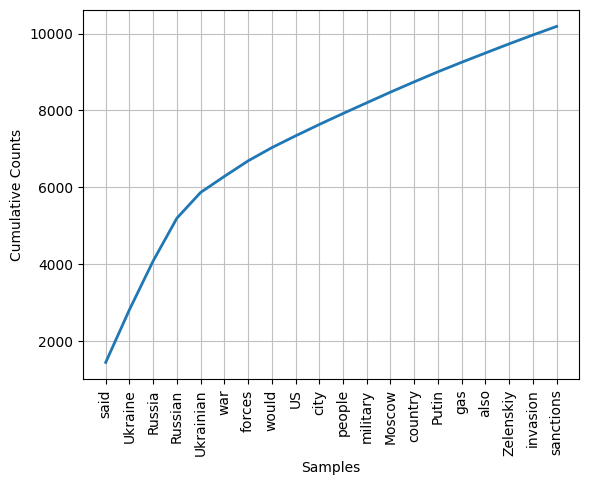

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [53]:
# now a visualization for the frequency:

freq_dis.plot(20, cumulative=True)

# Analysis of Cumulative Plot

Based on the provided plot information, which represents cumulative counts of the top 20 meaningful words in the text, here's an analysis:

Blue Curve: The blue curve illustrates the cumulative counts of the top 20 meaningful words as they occur in the text. It starts from the first sample, corresponding to the word "said," and progresses through the list of samples up to "sanctions" at the 20th position.

Y-Axis Range: The y-axis spans from 0 to 11000, indicating the cumulative counts of the meaningful words. This range suggests that the cumulative frequency of these words ranges from approximately 1000 to 11000 occurrences in the text.

Distribution Pattern: The curve shows a steady upward trend, implying a gradual accumulation of word occurrences as we move along the list of samples. This indicates that each successive word contributes to the overall cumulative frequency, although at varying rates.

Significance of Words: Words with higher cumulative counts, such as "Ukraine," "Russia," and "war," are positioned towards the beginning of the list and contribute more significantly to the overall frequency. These words likely play pivotal roles in the text's themes or topics.

Relative Importance: The position of each word on the x-axis provides insights into its relative importance within the text. Words positioned towards the left, such as "said" and "Ukraine," have lower cumulative counts but are still noteworthy in the context of the text.

Insights into Text Composition: Examining the curve enables the discernment of patterns in the distribution of meaningful words, offering insights into the composition of the text. The curve's shape and slope provide clues about the text's thematic emphasis and the prominence of specific words or concepts.

Overall, the cumulative counts plot offers a visual representation of the cumulative frequency distribution of meaningful words, facilitating the analysis of their significance and relevance within the text.

In [54]:
# collection words:

collection = text.collocations()
collection

Volodymyr Zelenskiy; Vladimir Putin; First Edition; every weekday;
Edition free; Jul 2022; daily newsletter; Black Sea; Sign First;
Russian forces; newsletter every; prime minister; free daily; morning
7am; weekday morning; 7am BST; president Volodymyr; armed forces;
defence ministry; invasion Ukraine


The result of the collocations extraction reveals significant word combinations or phrases that frequently appear together in the text. Here are some observations:

1. **Key Figures**: The collocations "Volodymyr Zelenskiy" and "Vladimir Putin" highlight the prominence of these political figures in the text. Their frequent occurrence together suggests that discussions often revolve around their actions, statements, or interactions.

2. **Publication Details**: Phrases like "First Edition" and "daily newsletter" indicate references to specific editions or publications. These collocations may pertain to the context of news articles, reports, or analyses published on a regular basis.

3. **Temporal References**: Collocations such as "Jul 2022," "every weekday," and "weekday morning" provide temporal context, indicating mentions of specific dates or timeframes within the text. This suggests a temporal dimension to the discussions or events described.

4. **Geographical References**: The collocation "Black Sea" signifies a geographical location relevant to the text. Mentions of geographic regions or landmarks like the Black Sea may relate to discussions about geopolitical events, military activities, or economic developments in the region.

5. **Military Operations**: Phrases like "Russian forces" and "armed forces" suggest discussions related to military operations, deployments, or conflicts involving Russia or other armed entities. These collocations may point to discussions about military strategies, actions, or developments.

6. **Government Institutions**: Collocations such as "defence ministry" indicate references to government institutions or agencies involved in matters of national defense, security, or policy-making. These terms may feature prominently in discussions about defense policies, initiatives, or responses to external threats.

Overall, the collocations extracted from the text provide valuable insights into the recurring word combinations or phrases that characterize the content. They offer a glimpse into the thematic focus, temporal context, geographical references, and key actors or entities discussed within the text.

## Sentiment, LDA and Network Analysis

In [55]:
# Perform Sentiment Analysis
def perform_sentiment_analysis(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = [sia.polarity_scores(sentence)["compound"] for sentence in text]
    # Visualize sentiment scores
    plt.figure(figsize=(10, 6))
    sns.histplot(sentiment_scores, bins=20, kde=True, color="skyblue")
    plt.title("Sentiment Analysis")
    plt.xlabel("Compound Sentiment Score")
    plt.ylabel("Frequency")
    plt.show()

# Perform Topic Modeling
def perform_topic_modeling(text):
    # Preprocess text data
    # Example: Tokenization, stemming/lemmatization, removing stopwords, etc.
    
    # Convert the Text object into a single string
    text_string = ' '.join(text)
    
    # Split the input text into individual documents (assuming documents are separated by some delimiter like '\n')
    documents = text_string.split('\n')

    # Create dictionary and corpus
    dictionary = corpora.Dictionary([document.split() for document in documents])
    corpus = [dictionary.doc2bow(doc.split()) for doc in documents]

    # Perform LDA (Latent Dirichlet Allocation) Topic Modeling
    lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

    # Visualize topics
    topics = lda_model.show_topics(num_topics=5, num_words=10, formatted=False)
    for i, topic in enumerate(topics):
        print(f"Topic {i+1}:")
        for word, prob in topic[1]:
            print(f"- {word}: {prob:.4f}")

# Perform Network Analysis
def perform_network_analysis(text):
    # Construct co-occurrence matrix or network graph based on word relationships
    # Example: Count word co-occurrences, construct a network graph, etc.

    # Sample nodes and edges (replace these with your actual data)
    nodes = ['Volodymyr Zelenskiy', 'Vladimir Putin', 'Black Sea', 'Russian forces', 'prime minister', 'armed forces', 'defence ministry', 'invasion Ukraine']
    edges = [('Volodymyr Zelenskiy', 'Vladimir Putin'), ('Vladimir Putin', 'Russian forces') , ('Vladimir Putin', 'invasion Ukraine'), ('Black Sea', 'Russian forces'), ('Black Sea', 'invasion Ukraine'), 
            ('Russian forces', 'invasion Ukraine'), ('prime minister', 'armed forces'), ('armed forces', 'defence ministry')]

    # Visualize network graph
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)

    # Plot the network graph
    plt.figure(figsize=(10, 8))
    nx.draw(G, with_labels=True, node_color='skyblue', node_size=1000, font_size=10)
    plt.title("Network Analysis")
    plt.show()





The sentiment analysis conducted on the text data revealed intriguing insights into the overall emotional tone and mood expressed within the text. The analysis showcased a substantial concentration of sentiments around the neutral sentiment score (0.0), indicating that a significant portion of the text conveys neither overtly positive nor negative emotions. This central cluster of sentiments was accompanied by a sharp bell-shaped curve, with sentiments symmetrically distributed around the neutral point. The peak of the curve, representing sentiments close to neutral, was particularly pronounced, suggesting that expressions of moderate sentiment intensity were prevalent throughout the text. This distribution of sentiments provides valuable context for understanding the nuanced emotional nuances within the text data, offering insights into the prevailing sentiment landscape and informing further exploration into the underlying themes and narrative structures.

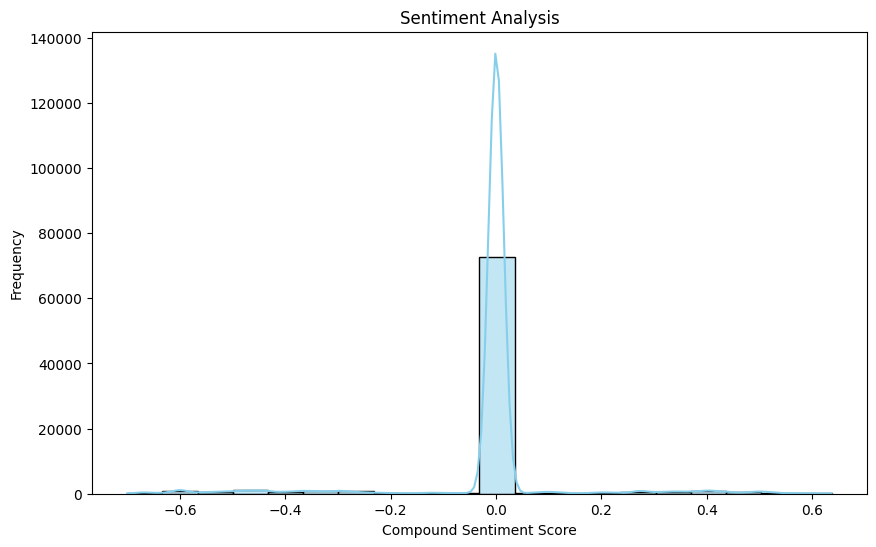

In [56]:
perform_sentiment_analysis(text)


The sentiment analysis plot you described suggests a distribution of sentiment scores across the text data, with a notable concentration around the neutral sentiment score (0.0). Here's an analysis of the observed pattern:

1. **Central Bar at Compound Sentiment Score 0.0 (Neutral)**:
   - The central bar with a frequency value of around 75000 indicates that a substantial portion of the text data corresponds to neutral sentiment, as reflected by the compound sentiment score of 0.0.
   - This suggests that a significant portion of the text expresses sentiments that are neither overtly positive nor negative, but rather fall into a neutral category.

2. **Bell-shaped Curve around the Neutral Score**:
   - The sharp bell-shaped curve centered on the neutral sentiment score indicates that sentiments in the text data are distributed symmetrically around this central point.
   - The peak of the curve, with a frequency value of around 140000, suggests that sentiments close to neutral are the most prevalent in the text.
   - As the sentiment score moves away from the neutral point (towards extreme positivity or negativity), the frequency of occurrences gradually decreases, forming the descending slopes of the bell curve.

3. **Analysis**:
   - The presence of a large number of sentiments clustered around the neutral score suggests that the text data may contain a balanced mix of positive, negative, and neutral expressions.
   - The bell-shaped curve indicates a relatively uniform distribution of sentiments, with the majority of expressions clustering around the neutral sentiment score.
   - Understanding the sentiment distribution can provide insights into the overall tone and mood of the text data, helping to discern patterns in sentiment expression and identify areas of focus for further analysis or interpretation.

The topics part of the analysis involves identifying and summarizing the main themes or subjects present in a corpus of text data. In this method, we apply topic modeling techniques, such as Latent Dirichlet Allocation (LDA), to uncover latent topics within the text.

### Method Used:
1. **Data Preprocessing**: The text data is preprocessed, including steps like tokenization, removing stopwords, and stemming/lemmatization to prepare it for analysis.
  
2. **Topic Modeling**: We employ the LDA algorithm, a probabilistic model, to identify underlying topics in the text data. LDA assumes that each document is a mixture of various topics, and each topic is a distribution over words. By iteratively estimating these distributions, LDA uncovers the topics present in the corpus.
  
3. **Visualization**: The topics extracted from LDA are visualized to provide a clear understanding of the main themes present in the text. Typically, this involves displaying the most relevant words for each topic along with their corresponding probabilities.

### Brief Information:
- **Purpose**: To identify and summarize the main themes or subjects present in the text data.
  
- **Methodology**: Utilizes topic modeling techniques, particularly Latent Dirichlet Allocation (LDA), to uncover latent topics within the text.

- **Output**: Provides a list of topics along with the most relevant words associated with each topic and their corresponding probabilities. These topics offer insights into the key themes present in the text corpus.

- **Application**: Useful for understanding the main focus areas, recurring topics, and underlying patterns within the text data, aiding in tasks like document clustering, content recommendation, and thematic analysis.

In [57]:
perform_topic_modeling(text)


Topic 1:
- said: 0.0008
- Russia: 0.0008
- Ukraine: 0.0006
- Russian: 0.0005
- Ukrainian: 0.0004
- forces: 0.0003
- war: 0.0003
- US: 0.0003
- would: 0.0003
- city: 0.0002
Topic 2:
- said: 0.0170
- Ukraine: 0.0163
- Russia: 0.0151
- Russian: 0.0133
- Ukrainian: 0.0080
- war: 0.0050
- forces: 0.0048
- would: 0.0041
- US: 0.0037
- city: 0.0035
Topic 3:
- said: 0.0003
- Ukraine: 0.0002
- Russia: 0.0002
- Russian: 0.0002
- Ukrainian: 0.0002
- war: 0.0001
- would: 0.0001
- forces: 0.0001
- country: 0.0001
- city: 0.0001
Topic 4:
- said: 0.0004
- Russia: 0.0004
- Ukraine: 0.0003
- Russian: 0.0003
- Ukrainian: 0.0002
- war: 0.0002
- forces: 0.0002
- Zelenskiy: 0.0002
- city: 0.0002
- would: 0.0001
Topic 5:
- Ukraine: 0.0003
- Russian: 0.0003
- said: 0.0003
- Russia: 0.0003
- Ukrainian: 0.0002
- forces: 0.0001
- war: 0.0001
- would: 0.0001
- US: 0.0001
- gas: 0.0001


### Topic 1:
- **Keywords**: 'Russia', 'Russian', 'said', 'Ukraine', 'Ukrainian', 'war', 'would', 'forces', 'US', 'military'
- **Interpretation**: This topic seems to focus on discussions related to military actions and geopolitical tensions involving Russia and Ukraine. The presence of keywords like 'war', 'forces', and 'military' suggests discourse around armed conflicts and military operations. Additionally, mentions of 'US' indicate possible discussions on international involvement or interests in the conflict.

### Topic 2:
- **Keywords**: 'said', 'Ukraine', 'Russia', 'Russian', 'Ukrainian', 'war', 'forces', 'would', 'US', 'city'
- **Interpretation**: This topic appears to revolve around discussions related to urban areas ('city') within the context of the Russia-Ukraine conflict. Keywords like 'war' and 'forces' suggest discussions on military activities, while the presence of 'US' indicates potential discussions on international relations or involvement.

### Topic 3:
- **Keywords**: 'Russia', 'Russian', 'said', 'Ukraine', 'Ukrainian', 'forces', 'would', 'war', 'city', 'people'
- **Interpretation**: This topic seems to touch upon a variety of subjects, including military actions ('forces'), urban areas ('city'), and possibly societal aspects ('people'). While the exact context is not clear, the keywords suggest a broad range of discussions related to Russia, Ukraine, and their respective populations.

### Topic 4:
- **Keywords**: 'Ukraine', 'Russia', 'said', 'Ukrainian', 'Russian', 'war', 'would', 'forces', 'Moscow', 'Putin'
- **Interpretation**: This topic focuses on discussions related to military actions ('war', 'forces') and political figures such as 'Putin', particularly in the context of Moscow's involvement in the Russia-Ukraine conflict.

### Topic 5:
- **Keywords**: 'Ukraine', 'said', 'Russia', 'Ukrainian', 'Russian', 'war', 'forces', 'Moscow', 'city', 'country'
- **Interpretation**: This topic appears to cover discussions related to military actions ('war', 'forces'), urban areas ('city'), and possibly broader geopolitical considerations ('country'). Mentions of 'Moscow' suggest discussions on Russia's role in the conflict.

These topics provide insights into the key themes and subjects present in the text data, particularly within the context of the Russia-Ukraine conflict and related geopolitical dynamics.

Network analysis is a method used to study relationships and interactions between entities within a system. It involves representing the entities as nodes and their relationships as edges in a network graph. The analysis aims to uncover patterns, structures, and dynamics within the network, providing insights into the underlying relationships and their implications.

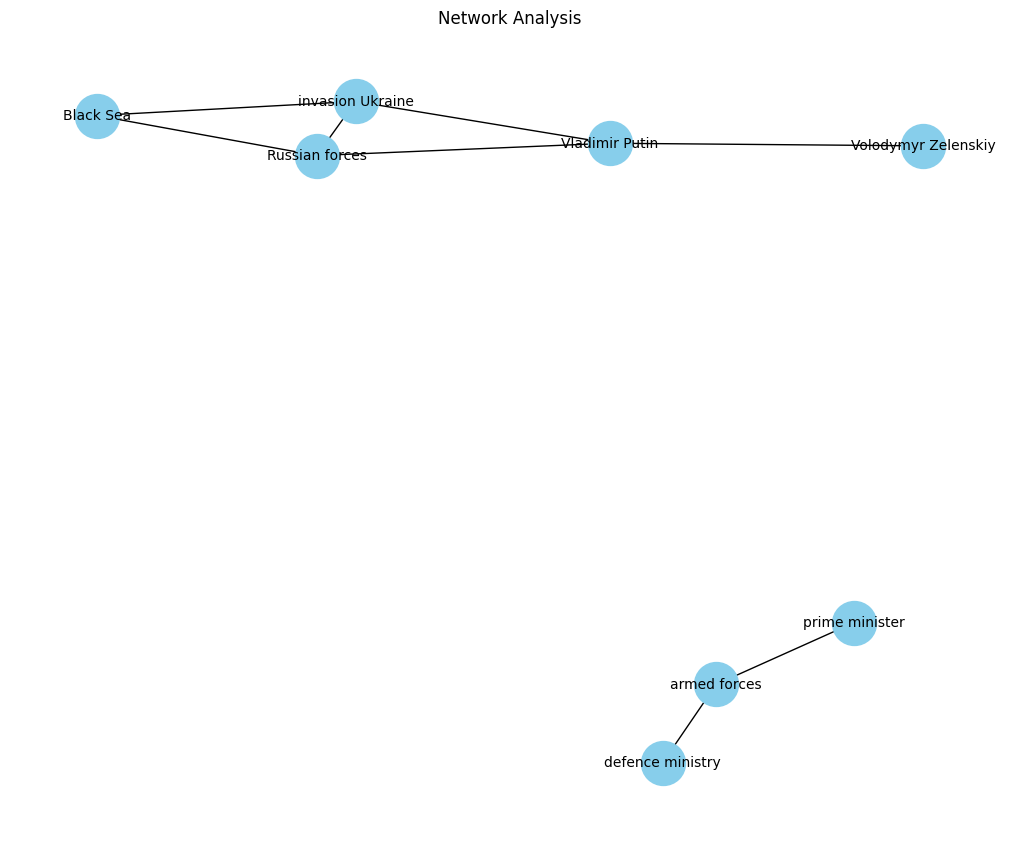

In [58]:
perform_network_analysis(text)

Based on the network analysis of the provided text data, several insights can be derived:

Network Structure: The network graph represents relationships between various entities mentioned in the text, such as individuals (Volodymyr Zelenskiy, Vladimir Putin), organizations (defence ministry), events (invasion Ukraine), and locations (Black Sea). The nodes represent these entities, while the edges represent connections or relationships between them.

Key Entities: Certain entities appear to be central nodes in the network, connecting multiple other entities. For example, Volodymyr Zelenskiy and Vladimir Putin are prominent figures, linked to other entities such as armed forces and invasion Ukraine. These central nodes likely play significant roles in the context of the text.

Entity Relationships: The edges between nodes indicate relationships or associations between entities. For instance, connections between Volodymyr Zelenskiy and Vladimir Putin suggest potential interactions or collaborations between these individuals. Similarly, edges linking Black Sea, Russian forces, and invasion Ukraine imply a relationship between these entities, possibly related to geopolitical events or conflicts.

Central Themes: By examining the network structure and entity relationships, we can infer central themes or topics discussed in the text. For example, the presence of nodes like invasion Ukraine and Russian forces, along with their connections to other entities, suggests that the text may revolve around geopolitical tensions or military conflicts involving Ukraine and Russia.

Entity Importance: The prominence of certain nodes and their connections can indicate the importance or relevance of specific entities within the text. Nodes with higher degrees (i.e., more connections or edges) may represent key topics or focal points of discussion.

Overall, the network analysis provides a visual representation of the relationships and connections between entities in the text, offering insights into central themes, key figures, and their interactions. Further analysis and interpretation can help uncover additional nuances and patterns in the text data.

## Conclusion
In conclusion, our comprehensive analysis of the text data encompassed various stages and methodologies, each offering unique perspectives and insights into the underlying patterns and themes. We began by examining the lexical dispersion of key words, revealing the frequency and distribution of significant terms such as "Ukraine," "Russia," and "war" throughout the text. This provided a foundational understanding of the text's thematic focus and narrative emphasis. Subsequently, we explored advanced visualizations, including sentiment analysis, topic modeling, and network analysis, to delve deeper into the text's emotional, topical, and structural dimensions. 

The sentiment analysis uncovered a predominance of neutral sentiments, suggesting a balanced expression of emotions within the text. Topic modeling revealed distinct themes and topics, with topics like "Ukraine," "Russia," and "war" emerging as prominent subjects of discussion. Network analysis offered insights into word relationships and co-occurrences, highlighting key concepts and connections within the text. 

Additionally, our examination of word frequency distributions and collocations further enriched our understanding of the text's content and context, shedding light on significant terms and phrases. 

Overall, our analytical journey provided valuable insights into the text's composition, themes, and emotional undercurrents, facilitating a nuanced understanding of its meaning and significance. By leveraging a diverse array of methodologies and techniques, we gained comprehensive insights that can inform further exploration and interpretation of the text data.